<a href="https://colab.research.google.com/github/vincent0104/CPE-019-CPE32S1/blob/main/Balintongog_Hands_on_Activity_3_1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submission Details

Name: Balintongog, Vincent G. <br>
Course and Section: CPE 019-CPE32S1 <br>
Date of Submission: 14/06/2024 <br>
Instructor: Roman Richard <br>

---
#**Lab - Correlation Analysis in Python**

Objectives<br>
Part 1: The Dataset<br>
Part 2: Scatterplot Graphs and Correlatable Variables<br>
Part 3: Calculating Correlation with Python<br>
Part 4: Visualizing <br>


**Scenario/Background<br>**

Correlation is an important statistical relationship that can indicate whether the variable values are
linearly related.<br>

In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset.
In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part
3, you will use Python to calculate the correlation between two sets of variable.<br>

**Required Resources<br>**

1 PC with Internet access<br>
Raspberry Pi version 2 or higher<br>
Python libraries: pandas, numpy, matplotlib, seaborn<br>
Datafiles: brainsize.**txt**<br>

#**Part 1: The Dataset**<br>

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology
students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block
Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The
researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects.
Information about gender and body size (height and weight) are also included. The researchers withheld
the weights of two subjects and the height of one subject for reasons of confidentiality. Two simple
modifications were applied to the dataset:
1. Replace the quesion marks used to represent the withheld data points described above by the
'NaN' string. The substitution was done because Pandas does not handle the question marks
correctly.
2. Replace all tab characters with commas, converting the dataset into a CSV dataset.
The prepared dataset is saved as brainsize.txt.
Step 1: Loading the Dataset From a File.
Before the dataset can be used, it must be loaded onto memory.
In the code below, The first line imports the pandas modules and defines pd as a descriptor that refers to
the module.
The second line loads the dataset CSV file into a variable called brainFile.
The third line uses read_csv(), a pandas method, to convert the CSV dataset stored in brainFile into a
dataframe. The dataframe is then stored in the brainFrame variable.
Run the cell below to execute the described functions. <br>

In [ ]: # Code cell 1
import pandas as pd
brainFile = './Data/brainsize.txt'
brainFrame = pd.read_csv(brainFile)

In [49]:
import pandas as pd


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
brainFile = '/content/drive/MyDrive/brainsize.txt'
brainFrame = pd.read_csv(brainFile, sep='\t', na_values='.')

*Step 2: Verifying the dataframe.*<br>
To make sure the dataframe has been correctly loaded and created, use the head() method. Another
Pandas method, head() displays the first five entries of a dataframe.<br>
In [ ]: # Code cell 2
brainFrame.head()

In [52]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


#**Part 2: Scatterplot Graphs and Correlatable Variables**<br>
*Step 1: The pandas describe() method.*<br>

The pandas module includes the describe() method which performs same common calculations
against a given dataset. In addition to provide common results including count, mean, standard
deviation, minimum, and maximum, describe() is also a great way to quickly test the validity of the
values in the dataframe.
Run the cell below to output the results computed by describe() against the brainFrame dataframe.<br>
Code cell 3 brainFrame.describe()

In [53]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


*Step 2: Scatterplot graphs*<br>
Scatterplot graphs are important when working with correlations as they allow for a quick visual
verification of the nature of the relationship between the variables. This lab uses the Pearson correlation
coefficient, which is sensitive only to a linear relationship between two variables. Other more robust
correlation methods exist but are out of the scope of this lab.<br>

a. Load the required modules.<br>

Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.
Run the cell below to load these modules.
Code cell 4 import numpy as np
import matplotlib.pyplot as plt


*b. Separate the data.* <br>
To ensure the results do not get skewed because of the differences in male and female bodies, the
dateframe is split into two dataframes: one containing all male entries and another with only female
instances.
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the
respective entries.<br>
In [ ]: # Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

In [64]:
menDf.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


In [65]:
womenDf.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258


*c. Plot the graphs.*<br>

Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line
below uses Pandas mean() method to calculate the mean value between the three and store the result in
the menMeanSmarts variable. Notice that the first line also refers to the menDf, the filtered dataframe
containing only male entries.<br>
The second line uses the matplotlib method scatter() to create a scatterplot graph between the
menMeanSmarts variable and the MRI_Countattribute. The MRI_Count in this dataset can be thought as of
a measure of the physical size of the subjects' brains.<br>
The third line simply displays the graph.<br>
The fourth line is used to ensure the graph will be displayed in this notebook.<br>
In [ ]: # Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)<br>
plt.scatter(menMeanSmarts, menDf["MRI_Count"])<br>
plt.show()<br>
%matplotlib inline<br>
Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.<br>
In [ ]: # Code cell 7<br>
Graph the women-only filtered dataframe<br>
womenMeanSmarts = ?<br>
plt.scatter(?, ?)<br>
plt.show()<br>
%matplotlib inline

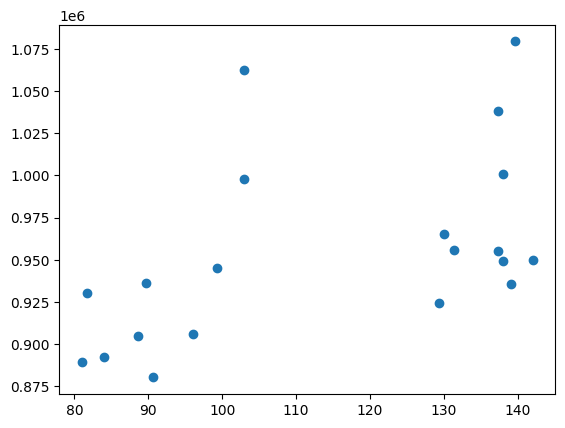

In [66]:
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

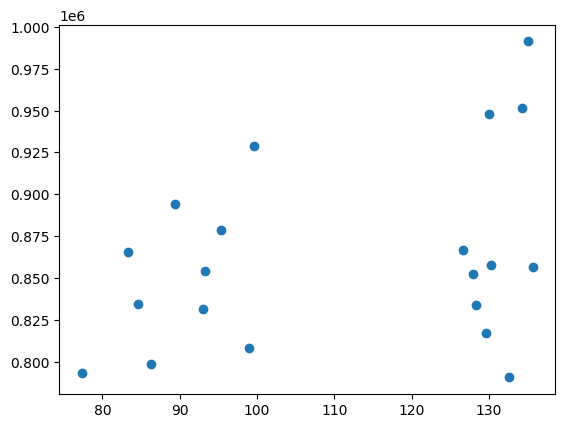

In [67]:
femaleMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(femaleMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

#**Part 3: Calculating Correlation with Python**<br>
*Step 1: Calculate correlation against brainFrame.*
The pandas corr() method provides an easy way to calculate correlation against a dataframe. By simply
calling the method against a dataframe, one can get the correlation between all variables at the same
time.<br>
In [ ]: # Code cell 8
brainFrame.corr(method='pearson')<br>

Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled
with 1s? Is that a coincidence? Explain.<br>
**-No, it is not a concident because the value of FSIQ  with itself will result to one. Hence, the value of 1 diagonally is just right because it came from the data.**

Still looking at the correlation table above, notice that the values are mirrored; values below the 1
diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.<br>

Using the same corr() method, it is easy to calculate the correlation of the variables contained in the
female-only dataframe:
In [ ]: # Code cell 9
womenDf.corr(method='pearson')
And the same can be done for the male-only dataframe:
In [ ]: # Code cell 10# Use corr() for the male-only dataframe with the pearson method #?.corr(?)

In [68]:
brainFrame.corr(method='pearson', numeric_only=True)


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


In [69]:
womenDf.corr(method='pearson', numeric_only=True)


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [73]:
menDf.corr(method='pearson', numeric_only=True)

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


#**Part 4: Visualizing**
*Step 1: Install Seaborn.*
To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored
squares, heatmap graphs can help identify correlations in a glance.
The Python module named seaborn makes it very easy to plot heatmap graphs.
First, run the cell below to download and install the seaborn module. <br>
In [ ]: # Code cell 11<br>
!pip install seaborn<br>

*Step 2: Plot the correlation heatmap.*<br>
Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the
cell below:<br>
Line 1: Generates a correlation table based on the womenNoGenderDf dataframe and stores it on wcorr.<br>
Line 2: Uses the seaborn heatmap() method to generate and plot the heatmap. Notice that heatmap()
takes wcorr as a parameter.<br>
Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it
has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for
informational purposes.<br>
In [ ]: # Code cell 12<br>
import seaborn as sns<br>
wcorr = womenDf.corr()<br>
sns.heatmap(wcorr)<br>
*#plt.savefig('attribute_correlations.png', tight_layout=True)*

In [74]:
!pip install seaborn

<Axes: >

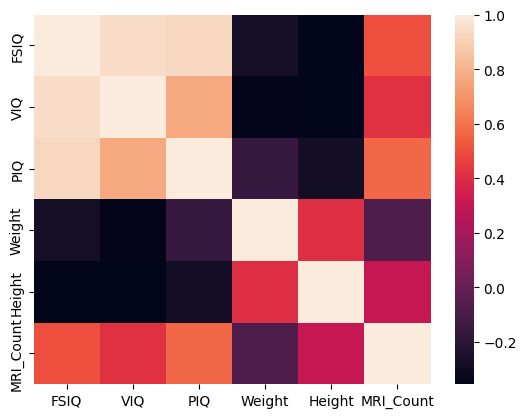

In [84]:
menDf_numeric = menDf.drop(columns=['Gender'])
wcorr = menDf_numeric.corr()
sns.heatmap(wcorr)



<Axes: >

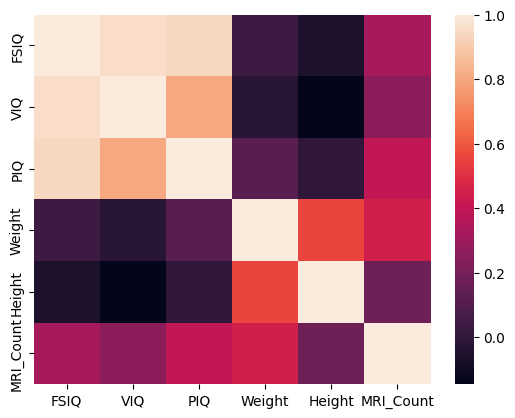

In [85]:
womenDf_numeric = womenDf.drop(columns=['Gender'])
wcorr = womenDf_numeric.corr()
sns.heatmap(wcorr)


#QUESTIONS:
Many variable pairs present correlation close to zero. What does that mean?<BR>
**-It means that the data/variable does not have any relation with the other data**<br>

Why separate the genders?<BR>
**-So the data will have different results.**<br>

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? <br>
**-The body**

**SUPPLEMENTARY ACTIVITY:**

In [138]:
import pandas as pd
import seaborn as sns
AirQuality = '/content/drive/MyDrive/AirQualityUCI.csv'
brainFrame = pd.read_csv(AirQuality, sep=';', na_values='.')


In [139]:
brainFrame.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [140]:
brainFrame.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
brainFrame.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


<Axes: >

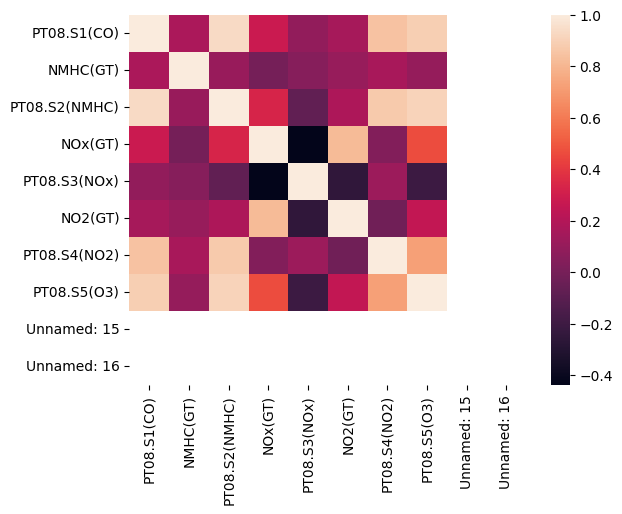

In [144]:
import seaborn as sns
numeric_columns = brainFrame.select_dtypes(include=['float64', 'int64'])
wcorr = numeric_columns.corr()
sns.heatmap(wcorr)


#**Conclusion:**<br>

**In this activity, I learned that how to import the brainsize dataset, then I learned how to use the plot to see the graph of the data. I also learned how to use the heatmap to see if there is variable that is not related.**

